## Inicializando

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

import sys
funcoes_path = os.getenv('funcoes_path')
sys.path.append(funcoes_path)

import datagen

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import psg as pypsg
#psg = pypsg.PSG(server_url='https://psg.gsfc.nasa.gov/api.php', timeout_seconds=200)


## Criando parâmetros aleatórios

In [ ]:
# Chamadas de API do PSG são limitadas por 100/dia
# Veja documentação do PSG: https://psg.gsfc.nasa.gov/help.php#handbook
caminho = '/home/sarah/Documentos/PSGCode'
nome_arquivo = 'datagen2'
datagen.gerar_conjunto_dados(psg = psg, n_planetas = 100, 
                             datagen_dir = caminho, quer_nuvem = False, 
                             verbose = False, arq_nome = nome_arquivo)

In [14]:
df = pd.read_parquet('/home/sarah/Documentos/PSGCode/data/datagen3.parquet')
df.head(3)

,OBJECT,OBJECT-NAME,OBJECT-DATE,OBJECT-DIAMETER,OBJECT-GRAVITY,OBJECT-GRAVITY-UNIT,OBJECT-STAR-DISTANCE,OBJECT-STAR-VELOCITY,OBJECT-SOLAR-LONGITUDE,OBJECT-SOLAR-LATITUDE,...,ATMOSPHERE-AEROS,ATMOSPHERE-ATYPE,ATMOSPHERE-AABUN,ATMOSPHERE-AUNIT,ATMOSPHERE-ASIZE,Wave/freq [um],Total [I/F apparent albedo],Noise,Stellar,Planet
0,Exoplanet,exo0,2017/12/22 15:09,16991.919711198327,6.596782623380935,g,0.20900985133127192,0.0,-353.90787990143167,74.65503503374964,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[0.025390806, 0.025390912, 0.025201142, 0.0246...","[0.00232597, 0.00231445, 0.00229394, 0.0022722...","[0.151087, 0.151087, 0.151087, 0.151087, 0.151...","[0.0253908, 0.0253909, 0.0252011, 0.024688, 0...."
1,Exoplanet,exo1,2017/12/22 15:09,10937.808839472938,5.192127512906319,g,1.4508179056425345,0.0,-341.6265007645143,36.38457301300116,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[0.072205018, 0.072416547, 0.071156951, 0.0672...","[209198000.0, 201072000.0, 191983000.0, 183390...","[9557940.0, 9557940.0, 9557940.0, 9557940.0, 9...","[0.072205, 0.0724165, 0.071157, 0.0672884, 0.0..."
2,Exoplanet,exo2,2017/12/22 15:09,18356.496894033353,6.878678241531611,g,0.6337938063053972,0.0,-8.154581112062544,32.65801036491814,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[0.002854778, 0.0034636696, 0.0033038243, 0.00...","[0.175387, 0.170961, 0.165708, 0.160679, 0.155...","[0.0872926, 0.0872926, 0.0872926, 0.0872926, 0...","[0.00285478, 0.00346367, 0.00330382, 0.0021978..."


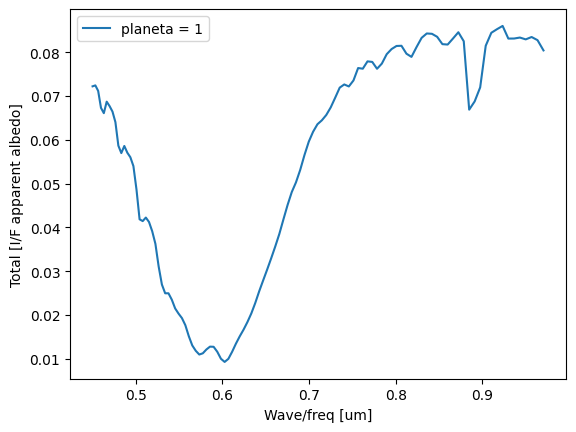

In [25]:
n = np.random.randint(0, len(df))
random = df.iloc[n]

wave_freq = random['Wave/freq [um]']
total_albedo = random['Total [I/F apparent albedo]']

plt.plot(wave_freq, total_albedo, label = f'planeta = {n}')

plt.xlabel('Wave/freq [um]')
plt.ylabel('Total [I/F apparent albedo]')
plt.legend()

plt.show()